# matplotlib
*Plot everything*

## Example 1: Plot for yourself

Plot something.

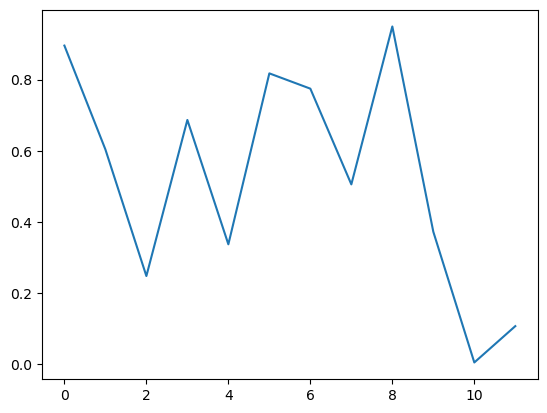

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.plot(np.random.rand(12))

## Example 2: Plot for publication

### Goal

Have a nice self contained plot, with labels, legends and multiple panels.

### Strategy
1. Create the *figure* and the *axes*.

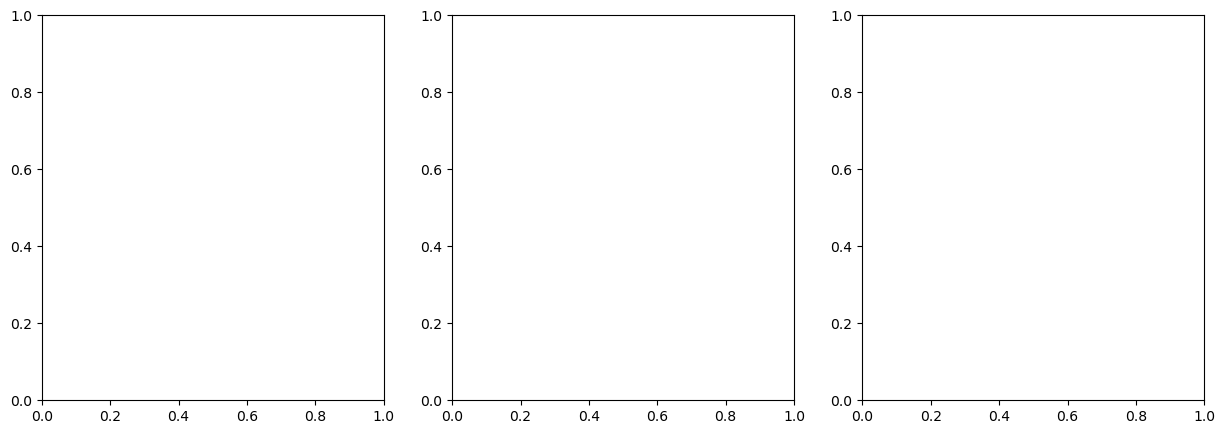

In [2]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5), facecolor = "white")

2. Add elements to the *axes* using the object approach.

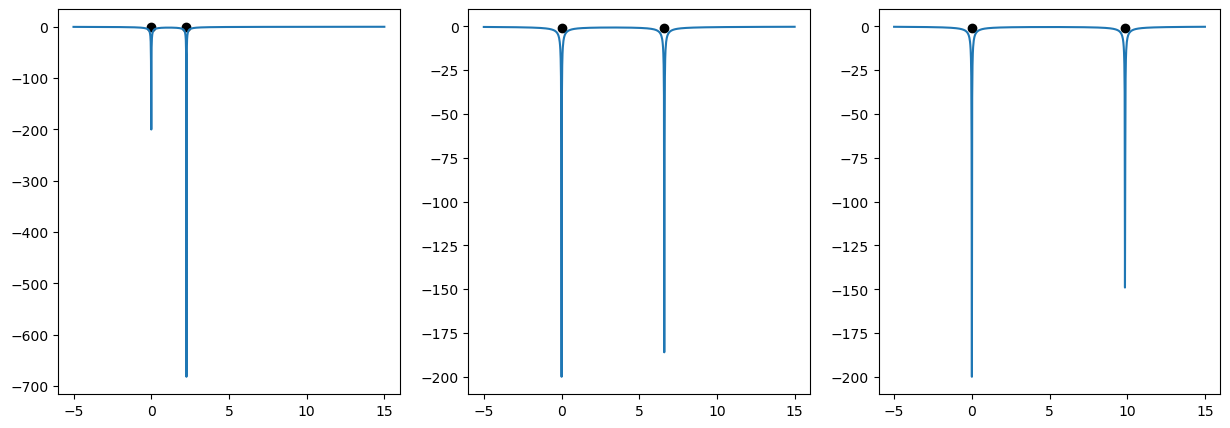

In [10]:
def potential(x, x0):
    return -1 / np.abs(x) - 1 / np.abs(x - x0)

x0s = [2.2658, 6.616992901, 9.861570409]
xx = np.linspace(-5, 15, 1000)

for (ax, x0) in zip(axes, x0s):
    ax.plot(xx, potential(xx, x0), label = "Potential")
    ax.scatter(0, -1, color = "black", label = "Atom")
    ax.scatter(x0, -1, color = "black")

fig

3. Fix the axes, add labels and a legend.

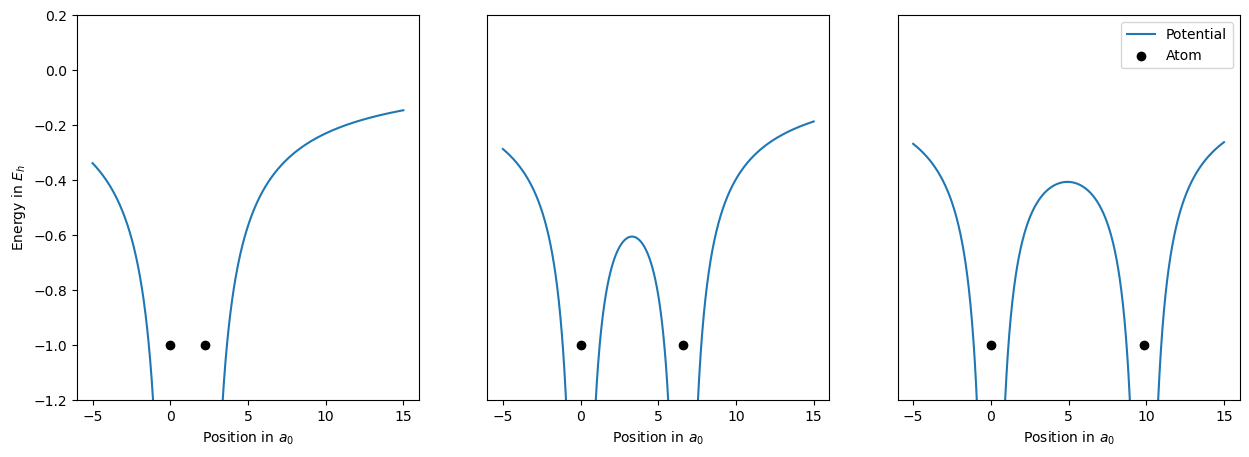

In [11]:
for ax in axes:
    ax.update({
        "ylim": (-1.2, 0.2),
        "xlabel": "Position in $a_0$"
    })

axes[0].update({
    "ylabel": "Energy in $E_h$"
})

axes[-1].legend()

for ax in axes[1:]:
    ax.set_yticks([])

fig

4. Save the figure.

In [12]:
fig.savefig("myfig.pdf")

## Example 3: The shortest introduction to software engineering

### Goal

Create a function that plot a summary of a dataset.

### Strategy

1. Write a prototype.
2. Elaborate a strategy.
3. Implement the strategy.
4. Return a `Figure` object.

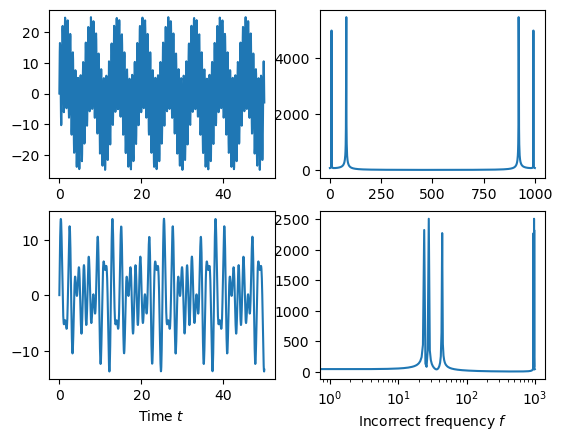

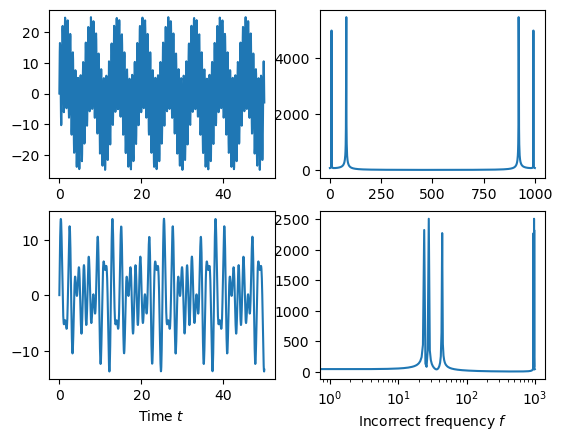

In [36]:
import numpy as np
from matplotlib import pyplot as plt

def generate_signal(frequencies, amplitudes, n, dt = 0.05):
    data = np.zeros(n) 
    tt = np.arange(0, n * dt, dt)

    for (f, A) in zip(frequencies, amplitudes):
        data += A * np.sin(f*tt)
    return data

datasetA = np.asarray([
    generate_signal([1, 10], [10, 15], 1000),
    generate_signal([3, 3.5, 5.5], [5, 5.1, 4.9], 1000)
])


fig, axes = plt.subplots(2, 2)
tt = np.arange(0, 50, 0.05)

axes[0, 0].plot(tt, datasetA[0])

fft = np.fft.fft(datasetA[0])
axes[0, 1].plot(np.abs(fft))

axes[1, 0].plot(tt, datasetA[1])
axes[1, 0].update({
    "xlabel": "Time $t$"
})

fft = np.fft.fft(datasetA[1])
axes[1, 1].plot(np.abs(fft))
axes[1, 1].update({
    "xscale": "log",
    "xlabel": "Incorrect frequency $f$"
})

fig

In [ ]:
datasetA = np.asarray([
    generate_signal([1, 10], [10, 15], 1000),
    generate_signal([3, 3.5, 5.5], [5, 5.1, 4.9], 1000)
])

datasetB = np.asarray([
    generate_signal([11], [1], 100),
    generate_signal([3, 0.5, 5.5], [12, 5.1, 4.9], 100),
    generate_signal([5, 50], [0.1, 0.2], 100)
])

datasetC = np.asarray([
    generate_signal([11, 10], [1, 1], 1000, dt = 0.01),
    generate_signal([3.33, 3.35, 5.55], [1, 0.5, 0.25], 1000, dt = 0.01)
])